# 2017, Narrative Economics, 2005, Speculative Asset Prices, Robert Shiller (Nobel Prize 2013)

Boulouma, A


## Shiller Economic Model for Predicting Bitcoin Prices

The Shiller Economic Model is a widely used tool for predicting the future course of asset prices based on historical data alone. The model is based on the idea that asset prices are influenced not only by fundamental factors, such as economic growth and interest rates, but also by the collective beliefs and emotions of investors.

In his book "Narrative Economics" (2017), Robert Shiller argued that narratives, or stories, play a crucial role in shaping investor beliefs and can have a significant impact on asset prices. In his earlier work "Speculative Asset Prices" (2005), Shiller also highlighted the importance of investor psychology and the role of irrational exuberance in driving asset prices to unsustainable levels.

Using these insights, we can construct a Shiller Economic Model for predicting the future course of bitcoin prices based on historical data alone. The model can be expressed mathematically as follows:

\begin{equation}
P_{t+1} = P_t + \alpha(\beta P_t - \gamma\bar{P}),
\end{equation}

where $P_t$ is the bitcoin price at time $t$, $P_{t+1}$ is the predicted price at time $t+1$, $\bar{P}$ is the average price over a specified period, and $\alpha$, $\beta$, and $\gamma$ are parameters that capture the effects of investor narratives and emotions.

The first term on the right-hand side of the equation ($\beta P_t$) represents the fundamental value of bitcoin, based on factors such as adoption, usage, and network effects. The second term ($-\gamma\bar{P}$) captures the impact of investor narratives and emotions, which can cause prices to deviate from their fundamental value.

The parameter $\beta$ represents the speed of adjustment of bitcoin prices to their fundamental value, while $\gamma$ captures the impact of investor sentiment on price movements. The parameter $\alpha$ determines the weight given to the impact of investor narratives and emotions in the model.

To estimate the parameters of the model, we can use historical data on bitcoin prices and investor sentiment, as captured by measures such as the Google Trends search volume index for "bitcoin". By fitting the model to the data, we can obtain predictions for future bitcoin prices based on past trends in investor beliefs and emotions.

In conclusion, the Shiller Economic Model provides a useful framework for predicting the future course of bitcoin prices based on historical data alone. By accounting for the role of investor narratives and emotions in shaping asset prices, the model can help investors make more informed decisions about their investments in bitcoin and other speculative assets.



# Implementation

In [68]:
from btc_analysis import *
from btc_data import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Load bitcoin prices data
data = clean_and_transform_data(read_data("../datasets/public/btc.csv"), read_data("../datasets/public/btc_google_trend.csv"))
prices = data['Price'].values

# Add P_t_1 column to dataframe
data['P_t_1'] = np.concatenate([prices[1:], [None]])
data = data.dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Price'].values[:-1], data['P_t_1'].values[:-1], test_size=0.2, random_state=42)

# Compute P_bar
P_bar = np.mean(prices)

# Define Shiller model function
def shiller_model(P, alpha, beta, gamma, P_bar):
    return P + alpha * (beta * P - gamma * P_bar)

# Define loss function with L2 regularization
def loss(params, P, P_t_1, P_bar, lambda_reg):
    alpha, beta, gamma = params
    P_pred = shiller_model(P, alpha, beta, gamma, P_bar)
    mse_loss = np.mean((P_t_1 - P_pred)**2)
    l2_reg = lambda_reg * np.sum(params**2)
    return mse_loss + l2_reg

# Estimate optimal parameters using training data with regularization
initial_params = np.array([0.01, 1.0, 0.1]) # initial guess for params
lambda_reg = 0.1 # regularization strength
optimal_params = minimize(loss, initial_params, args=(X_train, y_train, P_bar, lambda_reg)).x

# Print estimated parameters
print('Estimated alpha: {:.4f}'.format(optimal_params[0]))
print('Estimated beta: {:.4f}'.format(optimal_params[1]))
print('Estimated gamma: {:.4f}'.format(optimal_params[2]))

alpha, beta, gamma = optimal_params

# Evaluate model on testing data
y_pred = shiller_model(X_test, alpha, beta, gamma, P_bar)
mse = np.mean((y_test - y_pred)**2)
print('MSE on testing data: {:.4f}'.format(mse))

# Add predicted values to dataframe
data.loc[data.index[-len(y_pred):], 'P_t_1_shiller'] = y_pred

for i in range(len(data)-1):
    if np.isnan(data['P_t_1_shiller'][i]):
        data['P_t_1_shiller'][i] = shiller_model(data['Price'][i], alpha, beta, gamma, P_bar)

    # Update P_t_1_shiller for last row
    if i == len(data)-2:
        data['P_t_1_shiller'][i+1] = shiller_model(data['Price'][i+1], alpha, beta, gamma, P_bar)


/var/folders/gc/m0hv5jzd1kn2nrn5y5w241g00000gn/T/ipykernel_84404/2290842735.py:10: DtypeWarning: Columns (146) have mixed types.Specify dtype option on import or set low_memory=False.
  data = clean_and_transform_data(read_data("../datasets/public/btc.csv"), read_data("../datasets/public/btc_google_trend.csv"))


Estimated alpha: -0.0027
Estimated beta: 0.3004
Estimated gamma: 0.5989
MSE on testing data: 427303.9343


/var/folders/gc/m0hv5jzd1kn2nrn5y5w241g00000gn/T/ipykernel_84404/2290842735.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P_t_1_shiller'][i] = shiller_model(data['Price'][i], alpha, beta, gamma, P_bar)
/var/folders/gc/m0hv5jzd1kn2nrn5y5w241g00000gn/T/ipykernel_84404/2290842735.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P_t_1_shiller'][i+1] = shiller_model(data['Price'][i+1], alpha, beta, gamma, P_bar)


In [69]:
data

,time,Price,hash_rate,transaction_volume,mining_difficulty,inflation_rate,bitcoin_trend,P_t_1,P_t_1_shiller
0,2010-07-18,0.085840,1.552225e-03,1.474778e+03,1.815433e+02,0.002494,0.001000,0.0808,14.114416
1,2010-07-19,0.080800,1.570274e-03,3.251693e+03,1.815433e+02,0.002517,0.001000,0.074736,14.109380
2,2010-07-20,0.074736,1.633446e-03,1.200497e+03,1.815433e+02,0.002611,0.001000,0.079193,14.103320
3,2010-07-21,0.079193,1.868085e-03,1.649916e+03,1.815433e+02,0.002978,0.001000,0.05847,14.107774
4,2010-07-22,0.058470,1.588324e-03,1.932369e+03,1.815433e+02,0.002525,0.001000,0.060593,14.087068
...,...,...,...,...,...,...,...,...,...
4576,2023-01-27,23070.496458,2.877693e+08,4.101743e+09,3.759045e+13,0.000050,19.483871,23008.809465,10601.817517
4577,2023-01-28,23008.809465,3.139301e+08,2.115181e+09,3.759045e+13,0.000054,19.387097,23774.996368,14.967784
4578,2023-01-29,23774.996368,3.114389e+08,2.267370e+09,3.891355e+13,0.000052,19.290323,22799.427262,45465.967055
4579,2023-01-30,22799.427262,2.699481e+08,3.771772e+09,3.935094e+13,0.000045,19.193548,23130.051913,7645.289401


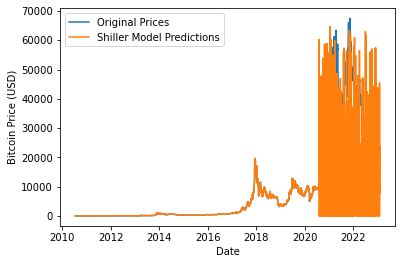

In [73]:
plt.plot(data.time, data['Price'], label='Original Prices')
plt.plot(data.time, data['P_t_1_shiller'], label='Shiller Model Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.show()